2009.75046966977
6.0
115553.4617376756
price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


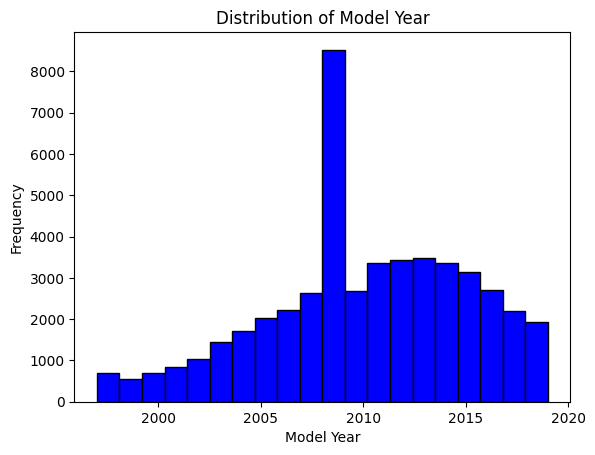

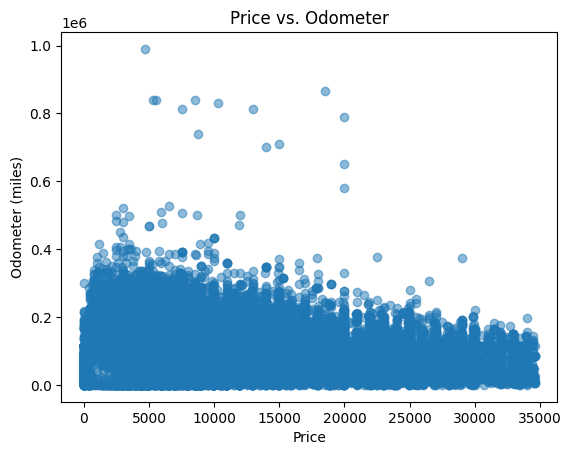

In [29]:
# Title: Exploratory Data Analysis (EDA)

# Introduction:
# This notebook performs primary data preprocessing and exploratory data analysis (EDA) 
# for the given dataset. The analysis includes handling missing values, removing outliers, 
# and creating visualizations to understand the data better.

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('vehicles_us.csv')

# Clean column names
df.columns = df.columns.str.strip()

# Ensure numeric data
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')
df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce')
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce' )
df['is_4wd'] = pd.to_numeric(df['is_4wd'], errors='coerce')

# Remove duplicates
df.drop_duplicates(inplace=True)

#Mean_Median
print(df['model_year'].mean())
print(df['cylinders'].median())
print(df['odometer'].mean())

#Fill the missing value on car color col

df['paint_color'] = df['paint_color'].astype(str)
df['paint_color'] = df['paint_color'].fillna('unknown')



# Fill missing values
df['cylinders'] = df['cylinders'].fillna(6)
df['model_year'] = df['model_year'].fillna(2009)
df['odometer'] = df['odometer'].fillna(115553)
df['is_4wd'] = df['is_4wd'].fillna(0)

# Remove outliers in 'model_year'
Q1 = df['model_year'].quantile(0.25)
Q3 = df['model_year'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['model_year'] >= (Q1 - 1.5 * IQR)) & (df['model_year'] <= (Q3 + 1.5 * IQR))]

# Remove outliers in 'price'
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
df = df[(df['price'] >= (Q1_price - 1.5 * IQR_price)) & (df['price'] <= (Q3_price + 1.5 * IQR_price))]

# Confirm changes
print(df.isna().sum())

# Histogram: Distribution of Model Year
plt.hist(df['model_year'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

# Scatterplot: Price vs. Odometer
plt.scatter(df['price'], df['odometer'], alpha=0.5)
plt.title('Price vs. Odometer')
plt.xlabel('Price')
plt.ylabel('Odometer (miles)')
plt.show()




Summary
In this project, an Exploratory Data Analysis (EDA) was performed on a vehicle dataset to understand key trends and clean the data for further analysis. The dataset includes variables like model_year, cylinders, odometer, price, and more.

Key steps included:

1- Data Preprocessing:
Handled missing values in important columns such as model_year, cylinders, and odometer.
Used median values to fill missing data, grouped by model or model_year to maintain consistency.
2- Outlier Removal:
Identified and removed outliers in model_year and price to ensure the scatterplots were more meaningful and representative of the data.
3- Data Visualization:
Created histograms to visualize the distribution of odometer and model_year readings.
Generated scatterplots and other visualizations to uncover relationships between key features in the dataset.
The project resulted in a cleaner and more informative dataset, with visualizations that provided insights into the distribution and trends within the vehicle data. This analysis serves as a foundation for further statistical modeling or business decision-making.